<a href="https://colab.research.google.com/github/Ignaciojeda/EDA_FundamentosML_IgnacioOjeda/blob/main/Prueba_Machine_Ignacio_Ojeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importar las librerias

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##2. Cargar el dataset
Luego de haber importado las librerias necesarias para realizar nuestro analisis debemos cargar el dataset, se puede hacer de varias maneras en este caso sincronizaremos nuestro google colab con drive para asi no haya necesidad de descargar siempre el dataset cuando necesitemos acceder a esta investigacion

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
url = '/content/drive/MyDrive/Machine/data.csv'
df = pd.read_csv(url, sep=",", encoding='latin-1')
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Para comenzar con el analisis importamos desde nuestros archivos el dataset al cual tambien se le proporcionara una abrevacion en este caso df. Tambien con la funcion head podremos observar las 15 primeras filas que nos entrega el dataset

In [11]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Con la funcion tail podemos observar los ultimos 5 registros del dataset

# ##3. Revisar los tipos de datos que poseen las columnas

In [15]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Las variables que tenemos son

*   InvoiceNo: El numero de factura
*   StockCode: Lo que nosotros conocemos como codigo de barra
*   Description: Descripcion
*   Quantity: Cantidad
*   InvoiceDate: Fecha de facturacion
*   UnitPrice: Precio por unidad
*   CustomerId: iD del cliente
*   Country: Pais




Tenemos varias columnas con datos de tipo objeto como pueden ser invoiceNo(Factura numero), StockCode, Description, InvoiceData(Fecha de factura), Country, no solo tenemos de tipo objeto sino que tambien contamos con enteros (int64) como Quantity (la Cantidad) y tambien tenemos datos de tipo flotante (float64) como unitPrice y CustomerId.

# Medidas de tendencia central

In [31]:
# Para variables numéricas (Quantity y UnitPrice)
print(df[['Quantity', 'UnitPrice']].describe())

            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


Aqui sacamos el promedio de las variables numericas, donde podemos observar que la cantidad de productos que los clientes compran es usualmente 9 productos y que  el precio por unidad promedio es de 4.6 libras (como es reino unido ocuparemos libras)

In [32]:
# Desviación estándar
print(df[['Quantity', 'UnitPrice']].std())

Quantity     218.081158
UnitPrice     96.759853
dtype: float64


De esta desviacion estandar podemos observar que la desviacion estandar por cantidad y por precio es de 218 (cantidad de productos) y 96 (libras) respectivamente

In [33]:
# Varianza
print(df[['Quantity', 'UnitPrice']].var())

Quantity     47559.391409
UnitPrice     9362.469164
dtype: float64


Al tener varianzas tan altas podemos concluir que los valores de ambas variables se alejan del promedio osea que hay productos con precios muy variados

In [34]:
# Para variables categóricas, en este caso el pais
print(df['Country'].mode())

0    United Kingdom
Name: Country, dtype: object


De esta moda podemos concluir que el pais que más compra en la tienda es de Reino Unido

# Distribucion por paises

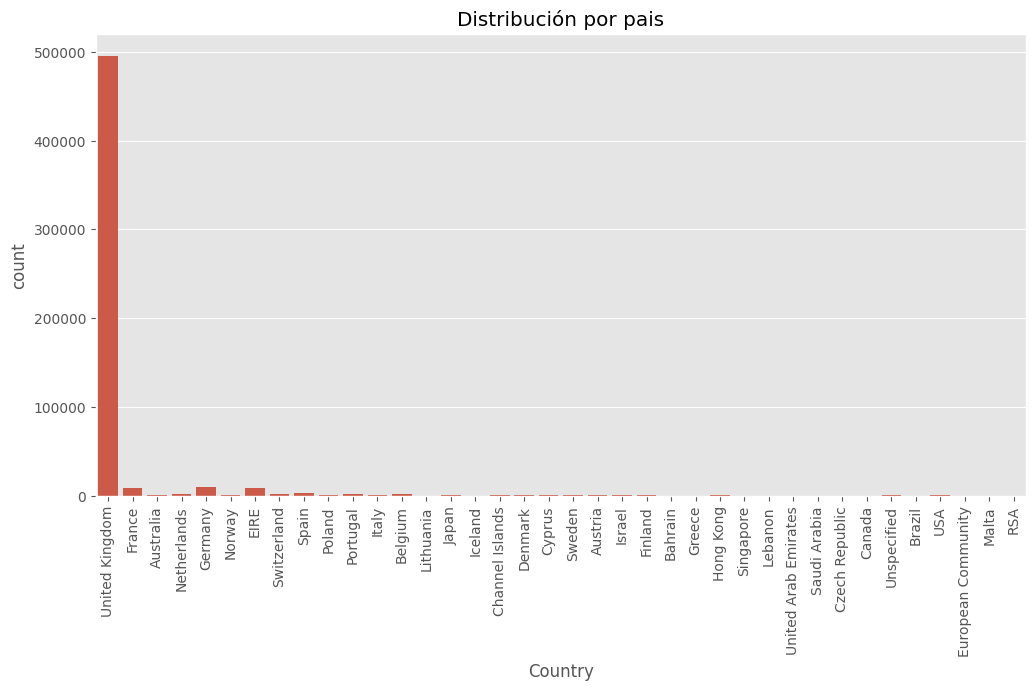

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df)
plt.title('Distribución por pais')
plt.xticks(rotation=90)
plt.show()

Para poder observar de mejor manera la moda anterior vemos en un grafico la cantidad de veces que un pais compra en la tienda, donde vemos la superioridad de paises como Reino Unido, Alemania, Irlanda (Eire).

# Analisis de datos
Una vez listos con todos nuestros datos y sabiendo el tipo de dato que son podemos empezar a trabajar con estos, realizaremos analisis descriptivos como ticket promedio, productos más vendidos, diferencias entre países, y comportamiento temporal de las compras.

**Producto más vendido**

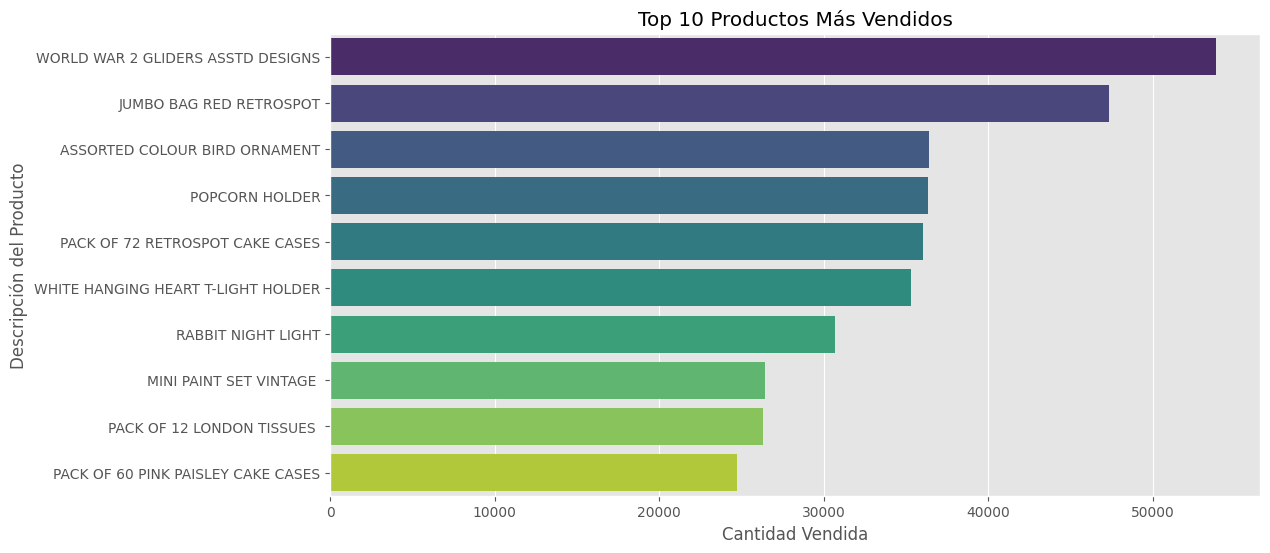

In [52]:
# Agrupar por 'Description' y sumar la 'Quantity'
productos_vendidos = df.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar por 'Quantity' de manera descendente y seleccionar los 10 más vendidos
top_10_productos = productos_vendidos.sort_values(by=['Quantity'], ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_10_productos, palette='viridis')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Descripción del Producto')
plt.show()

Aqui podemos observar los 10 productos más vendidos en la tienda